In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data.csv


In [4]:
data = pd.read_csv('Company_Data.csv')
data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
data.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [7]:
data["target"] = np.where((data["Sales"] < 9),"Low","High")
data

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US target  
0           17   Yes  Yes   High  
1           10   Yes  Yes   High  
2           12   Yes  Yes   High  
3           14   Yes  Yes    Low  
4           13   Yes   No    Low  
..         ...   ...  ...    ...  
395         14   Yes  Yes   High  
396         11    No  Yes    Low  
397         18   Yes  Yes    Low  
398         12   Yes  Yes    Low  
399         16   Yes  Yes   High  

[400 rows x 12 columns]

In [8]:
data['target'].describe()

count     400
unique      2
top       Low
freq      286
Name: target, dtype: object

In [9]:
from sklearn import preprocessing

data1 = data
label_encoder = preprocessing.LabelEncoder()
data1["ShelveLoc"]= label_encoder.fit_transform(data1["ShelveLoc"])
data1["Urban"]= label_encoder.fit_transform(data1["Urban"])
data1["US"]= label_encoder.fit_transform(data1["US"])
data1["target"]= label_encoder.fit_transform(data1["target"])

data1.head()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          0   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97          2   55   
4   4.15        141      64            3         340    128          0   38   

   Education  Urban  US  target  
0         17      1   1       0  
1         10      1   1       0  
2         12      1   1       0  
3         14      1   1       1  
4         13      1   0       1

In [10]:
data2 = data1.copy()
data2.drop(columns = ['target'])

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0     9.50        138      73           11         276    120          0   42   
1    11.22        111      48           16         260     83          1   65   
2    10.06        113      35           10         269     80          2   59   
3     7.40        117     100            4         466     97          2   55   
4     4.15        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395  12.57        138     108           17         203    128          1   33   
396   6.14        139      23            3          37    120          2   55   
397   7.41        162      26           12         368    159          2   40   
398   5.94        100      79            7         284     95          0   50   
399   9.71        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  
3           14      1   1  
4           13      1   0  
..         ...    ...  ..  
395         14      1   1  
396         11      0   1  
397         18      1   1  
398         12      1   1  
399         16      1   1  

[400 rows x 11 columns]

In [16]:
fig, ax = plt.subplots(3,4, figsize = (17,12),dpi=600)

sns.distplot(data2.Sales, ax = ax[0,0])
sns.distplot(data2.CompPrice, ax = ax[0,1])
sns.distplot(data2.Income, ax = ax[0,2])
sns.distplot(data2.Advertising, ax = ax[0,3])
sns.distplot(data2.Population, ax = ax[1,0])
sns.distplot(data2.Price, ax = ax[1,1])
sns.distplot(data2.ShelveLoc, ax = ax[1,2])
sns.distplot(data2.Age, ax = ax[1,3])
sns.distplot(data2.Education, ax = ax[2,0])
sns.distplot(data2.Urban, ax = ax[2,1])
sns.distplot(data2.US, ax = ax[2,2])
plt.show()

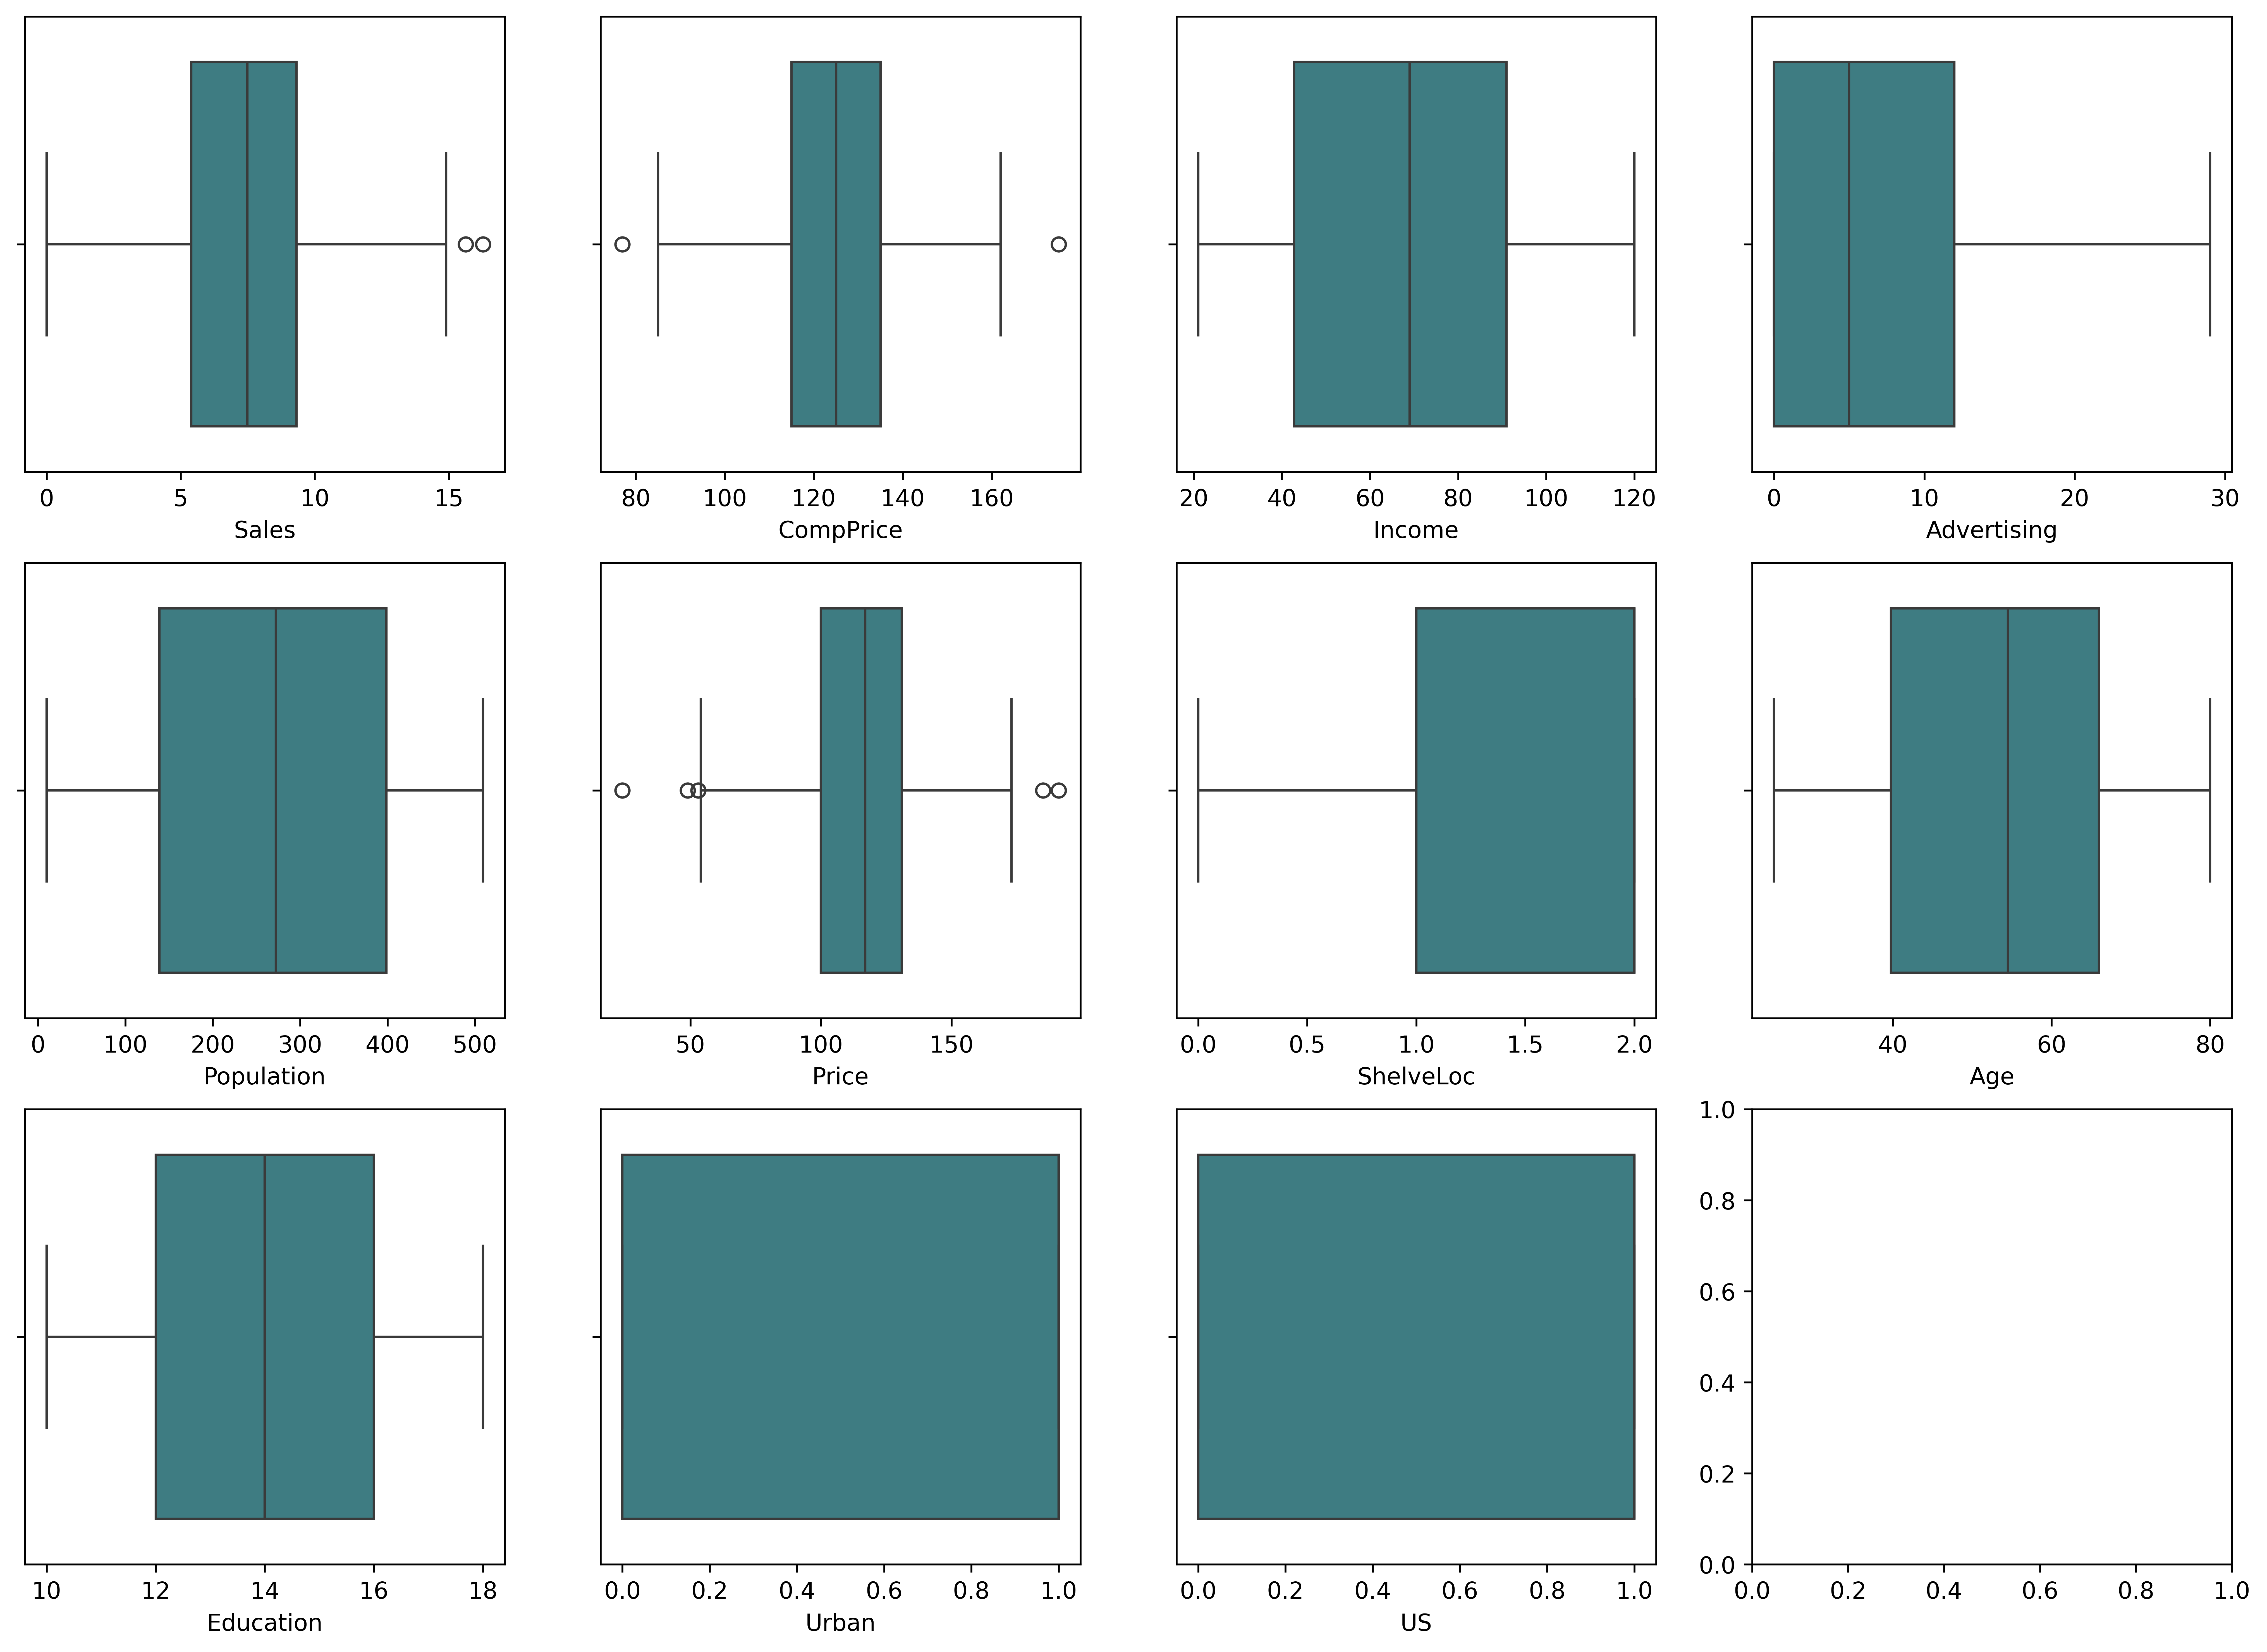

In [17]:
fig, ax = plt.subplots(3,4, figsize = (17,12),dpi=600)
sns.boxplot(data2.Sales,palette='crest', ax = ax[0,0],orient='h')
sns.boxplot(data2.CompPrice,palette='crest', ax = ax[0,1],orient='h')
sns.boxplot(data2.Income,palette='crest', ax = ax[0,2],orient='h')
sns.boxplot(data2.Advertising,palette='crest', ax = ax[0,3],orient='h')
sns.boxplot(data2.Population,palette='crest', ax = ax[1,0],orient='h')
sns.boxplot(data2.Price,palette='crest', ax = ax[1,1],orient='h')
sns.boxplot(data2.ShelveLoc,palette='crest', ax = ax[1,2],orient='h')
sns.boxplot(data2.Age,palette='crest', ax = ax[1,3],orient='h')
sns.boxplot(data2.Education,palette='crest', ax = ax[2,0],orient='h')
sns.boxplot(data2.Urban,palette='crest', ax = ax[2,1],orient='h')
sns.boxplot(data2.US,palette='crest', ax = ax[2,2],orient='h')
plt.show()

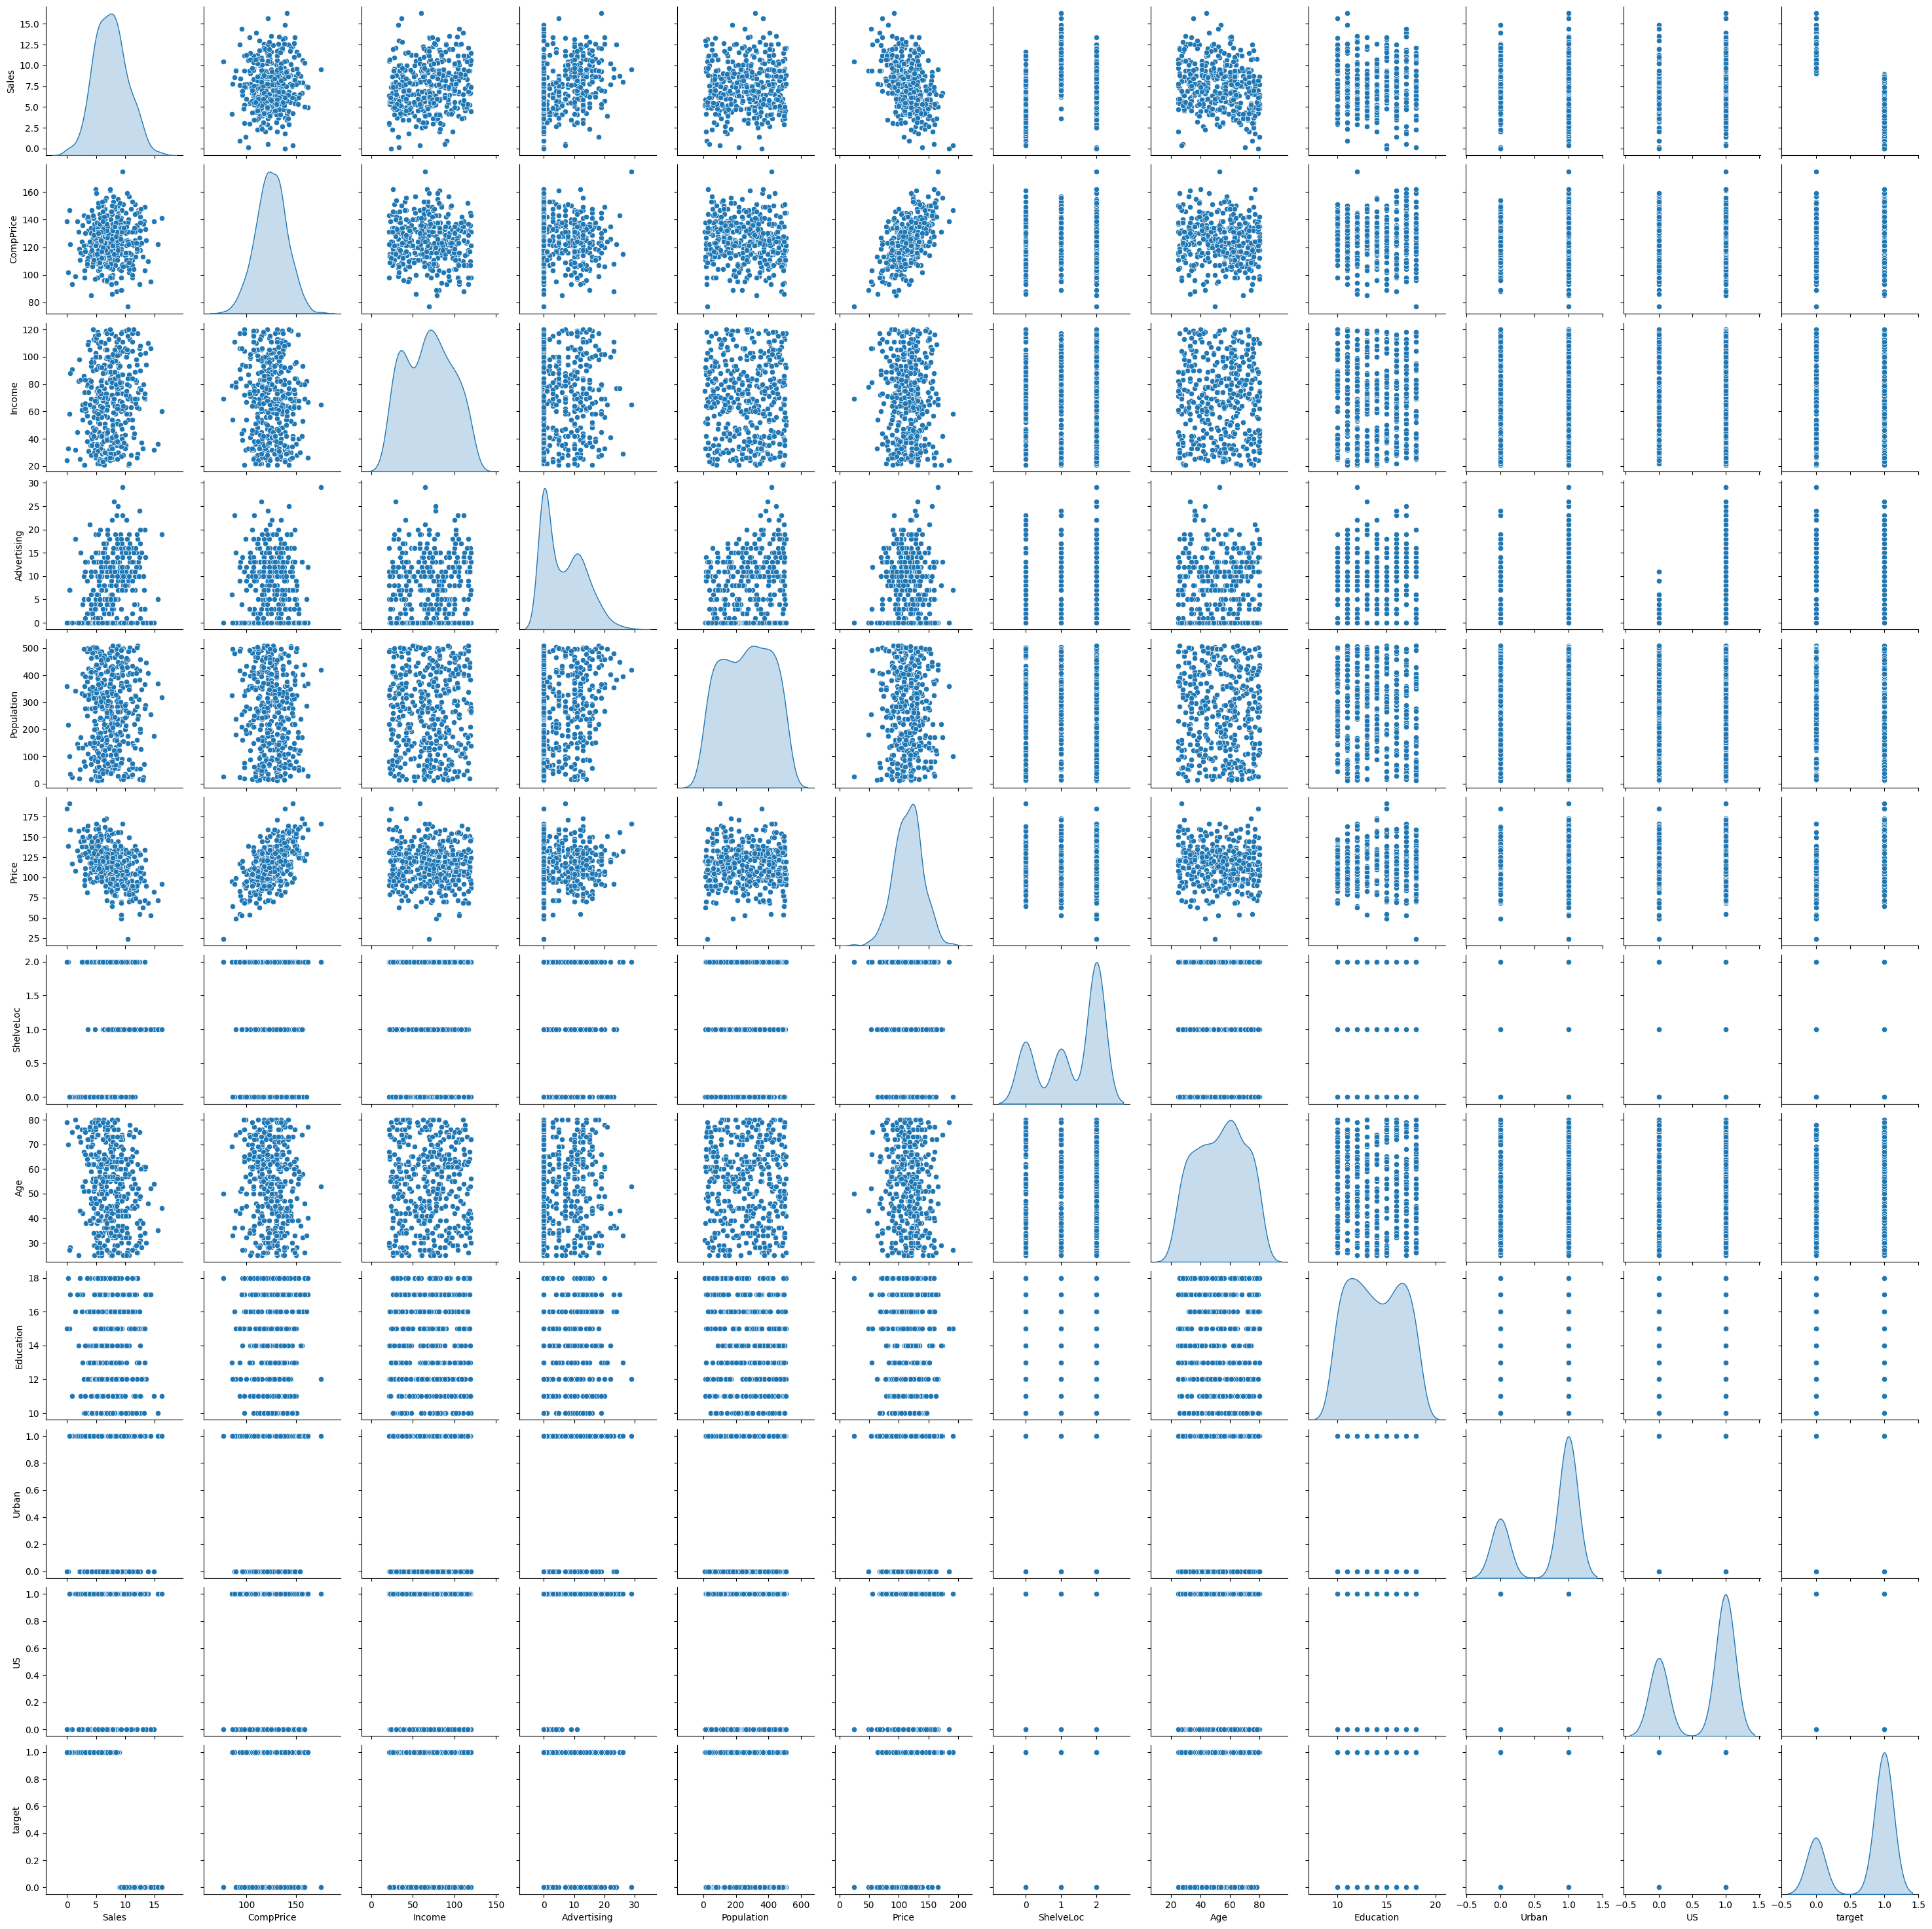

In [ ]:
sns.pairplot(data2, diag_kind='kde')

<Axes: xlabel='Sales', ylabel='Income'>

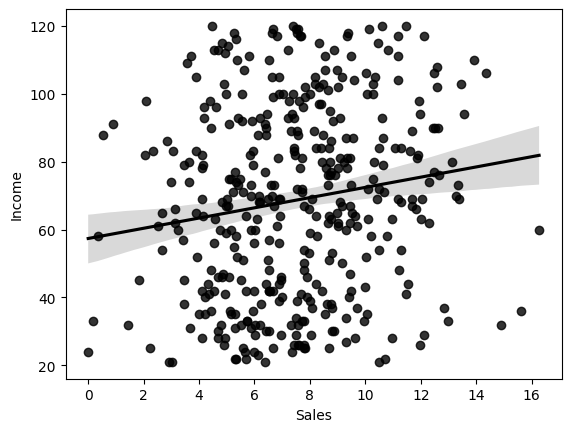

In [11]:
sns.regplot(x='Sales', y='Income', data=data2, color='black')

<Axes: >

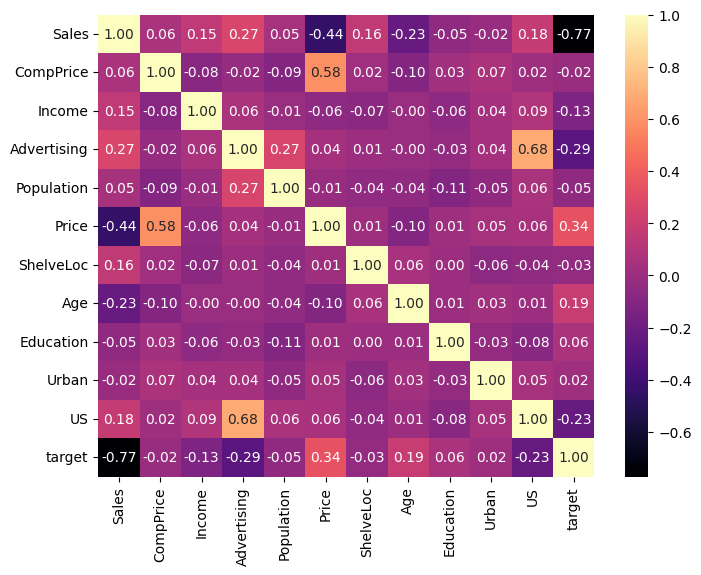

In [12]:
plt.figure(figsize = (8, 6));
sns.heatmap(data2.corr(), cmap='magma', annot=True, fmt=".2f")

In [13]:
data1 = data1.drop(columns = ['Sales'])
data1.head()

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0        138      73           11         276    120          0   42   
1        111      48           16         260     83          1   65   
2        113      35           10         269     80          2   59   
3        117     100            4         466     97          2   55   
4        141      64            3         340    128          0   38   

   Education  Urban  US  target  
0         17      1   1       0  
1         10      1   1       0  
2         12      1   1       0  
3         14      1   1       1  
4         13      1   0       1

In [18]:
x = data1.iloc[:,:-1]
y = data1.iloc[:,-1]

In [19]:
# Splitting data into train and test dataset :
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [20]:
# Creating Model :
model = RandomForestClassifier(n_estimators = 100, max_features = 4)
model.fit(x_train,y_train)

RandomForestClassifier(max_features=4)

In [21]:
y_pred = model.predict(x_test)
pred = pd.Series(y_pred)
pd.crosstab(y_test,y_pred)

col_0    0   1
target        
0       19   7
1        2  52

In [22]:
# Accuracy :
np.mean(y_pred == y_test)

0.8875

In [23]:
importance = model.feature_importances_
importance

array([0.10124571, 0.08929258, 0.10889421, 0.08920764, 0.23670722,
       0.1680936 , 0.11360377, 0.06778343, 0.01015508, 0.01501677])

<Axes: >

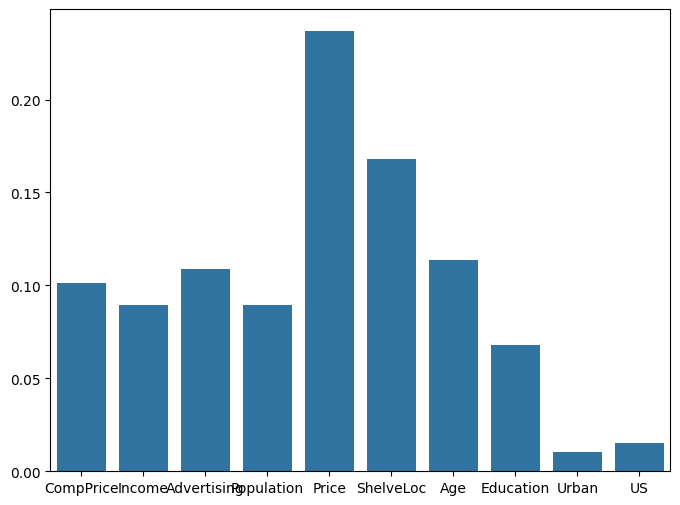

In [24]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.barplot(x=["CompPrice","Income","Advertising","Population","Price","ShelveLoc","Age","Education","Urban","US"], y=model.feature_importances_)